In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from math import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so

In [44]:
def exponential_decay(amplitude, delay, decay):
    return lambda t: amplitude * np.minimum(1.0, np.exp(- (t - delay) / decay))

def sample(f, sample_count, sampling_frequency):
    sampling_time = np.linspace(0, sample_count / sampling_frequency, sample_count)
    samples = np.array([f(t) for t in sampling_time])
    return sampling_time, samples

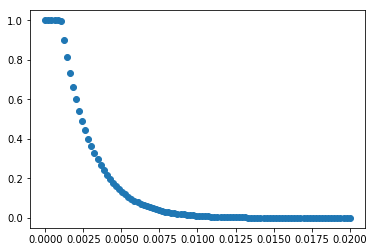

In [45]:
def generate_sample(amplitude, delay, decay, n_samples=100):
    f = exponential_decay(amplitude, delay, decay)
    return sample(f, n_samples, 5000)

time, samples = generate_sample(amplitude=1.0, delay=0.001, decay=0.002, n_samples=100)
plt.plot(time, samples, 'o')

[1.    0.001 0.002]


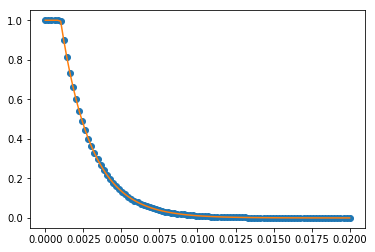

In [54]:
def expdec(t, amp, delay, decay):
    return exponential_decay(amp, delay, decay)(t)

x, y = time, samples
pw, cov = so.curve_fit(expdec, x, y, (10.0, 0.005, 0.005))
plt.plot(x, y, 'o', x, expdec(x, *pw), '-')
print(pw)